<a href="https://colab.research.google.com/github/mreza81960/mreza81960/blob/main/xfer_learn_epoch50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CECS-456 Project - Chess Piece Image Classification

Model #3: VGG16 transfer learning

Mohamad Rahai

In [ ]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
import matplotlib.pyplot as plt

To make Kaggle dataset available to Colab, 1st the dataset was uploaded to Google Drive and then the drive was mounted to Colab.

Dataset path: //content/drive/MyDrive/Chessman-image-dataset/Chess

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir="//content/drive/MyDrive/Chessman-image-dataset/Chess"
data_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,validation_split=0.2)
data_set=data_gen.flow_from_directory(data_dir, target_size=(224,224),
                                      color_mode='rgb',
                                      class_mode='categorical', seed=42,
                                      subset='training')
print(type(data_set))
validation=data_gen.flow_from_directory(data_dir, target_size=(224,224),
                                      color_mode='rgb',
                                      class_mode='categorical', seed=42,
                                      subset='validation')

Found 442 images belonging to 6 classes.
<class 'keras.preprocessing.image.DirectoryIterator'>
Found 109 images belonging to 6 classes.


In [ ]:
vgg_minus_top=tf.keras.applications.VGG16(include_top=False,
    weights='imagenet',pooling='avg',input_shape=(224,224,3))
vgg_minus_top.trainable=False
model=tf.keras.models.Sequential()
layer=tf.keras.layers
model.add(vgg_minus_top)
model.add(layer.Dense(128,activation='relu'))
layer.Dropout(0.5)
model.add(layer.Dense(64,activation='relu'))
layer.Dropout(0.5)
model.add(layer.Dense(6,activation='softmax'))
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 14,788,998
Trainable params: 74,310
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
print (type(data_set))
history=model.fit(data_set,batch_size=100,epochs=50, validation_data=validation)

<class 'keras.preprocessing.image.DirectoryIterator'>
Epoch 1/50
14/14 [==============================] - 286s 21s/step - loss: 1.7835 - accuracy: 0.2557 - val_loss: 1.6893 - val_accuracy: 0.3486
Epoch 2/50
14/14 [==============================] - 279s 20s/step - loss: 1.6567 - accuracy: 0.4389 - val_loss: 1.5758 - val_accuracy: 0.5688
Epoch 3/50
14/14 [==============================] - 278s 20s/step - loss: 1.5392 - accuracy: 0.5339 - val_loss: 1.4366 - val_accuracy: 0.5138
Epoch 4/50
14/14 [==============================] - 279s 20s/step - loss: 1.4110 - accuracy: 0.5543 - val_loss: 1.3068 - val_accuracy: 0.6055
Epoch 5/50
14/14 [==============================] - 276s 20s/step - loss: 1.2985 - accuracy: 0.5905 - val_loss: 1.2106 - val_accuracy: 0.5505
Epoch 6/50
14/14 [==============================] - 278s 20s/step - loss: 1.1869 - accuracy: 0.6199 - val_loss: 1.0927 - val_accuracy: 0.6514
Epoch 7/50
14/14 [==============================] - 277s 20s/step - loss: 1.1040 - accuracy: 0

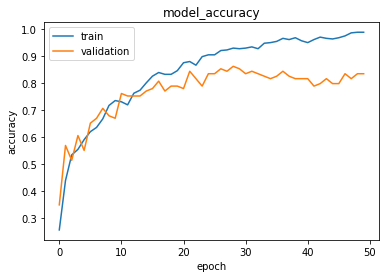

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper left')

In [ ]:
drive.flush_and_unmount()